In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df=pd.read_csv(r"c:\DATA SCIENCE\Machine_Learning\titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [118]:
df.shape

(891, 12)

In [119]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [120]:
df.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [122]:
df["Age"]=df["Age"].fillna(df["Age"].median())
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Cabin"]=df["Cabin"].fillna(df["Cabin"].mode()[0])

In [123]:
df.isnull().sum().sum()

np.int64(0)

In [124]:
df.duplicated().sum()

np.int64(0)

In [125]:
df.select_dtypes(include="object").head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,B96 B98,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96 B98,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,B96 B98,S


In [126]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
df["Sex"]=label_enc.fit_transform(df["Sex"]) #1 male,0 female
df["Embarked"]=label_enc.fit_transform(df["Embarked"])

In [127]:
df["Embarked"].value_counts()

Embarked
2    646
0    168
1     77
Name: count, dtype: int64

In [128]:
df.drop(["Name","Ticket","Cabin","PassengerId","SibSp"],axis=1,inplace=True)

<Axes: >

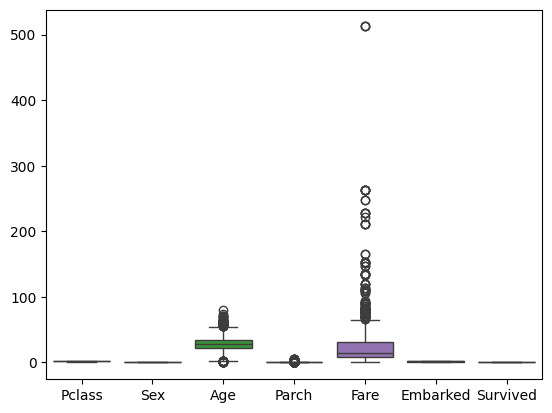

In [129]:
sns.boxplot(data=df)

In [130]:
df.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,Survived
0,3,1,22.0,0,7.2500,2,0
1,1,0,38.0,0,71.2833,0,1
2,3,0,26.0,0,7.9250,2,1
3,1,0,35.0,0,53.1000,2,1
4,3,1,35.0,0,8.0500,2,0


In [131]:
df.dtypes

Pclass        int64
Sex           int64
Age         float64
Parch         int64
Fare        float64
Embarked      int64
Survived      int64
dtype: object

In [132]:
x=df.drop("Survived",axis=1)
y=df["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<Axes: >

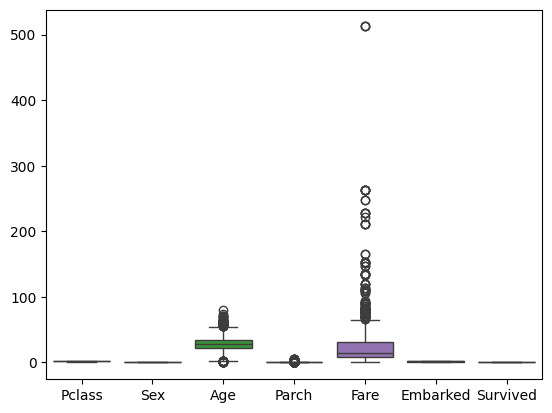

In [133]:
sns.boxplot(data=df)

In [134]:
df=df.dropna()

<Axes: ylabel='Fare'>

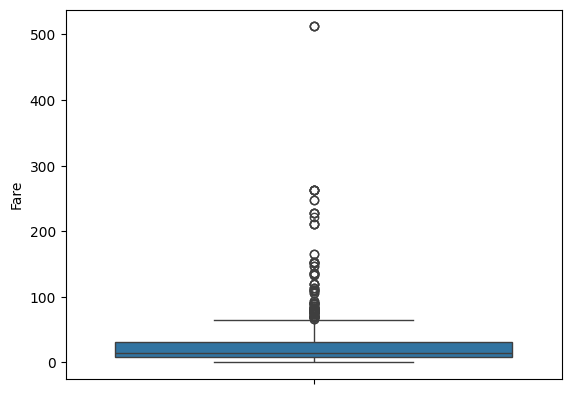

In [135]:
sns.boxplot(df["Fare"])

In [136]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.86)
x_train.shape,x_test.shape

((766, 6), (125, 6))

<Axes: >

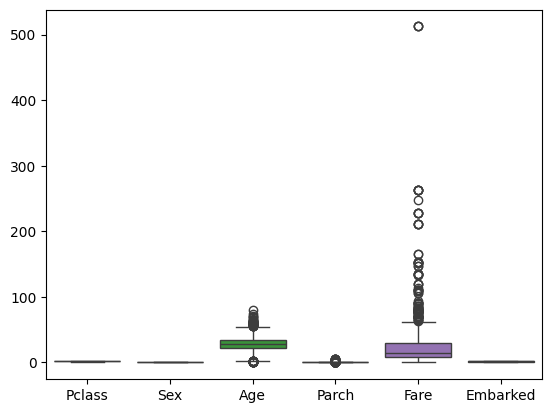

In [137]:
sns.boxplot(x_train)

In [138]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

<Axes: >

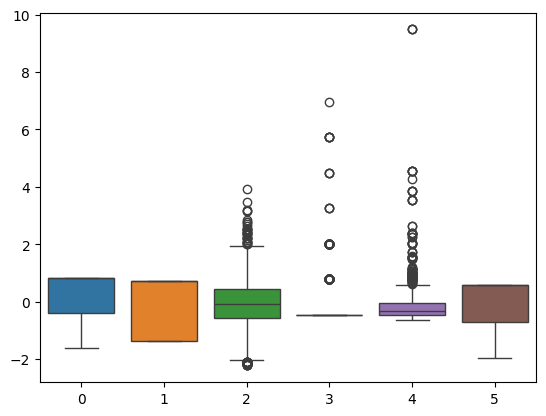

In [139]:
sns.boxplot(x_train_scaled)


In [140]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train_scaled,y_train)
y_predict=model.predict(x_test_scaled)
y_predict
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.84
[[69  5]
 [15 36]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        74
           1       0.88      0.71      0.78        51

    accuracy                           0.84       125
   macro avg       0.85      0.82      0.83       125
weighted avg       0.84      0.84      0.84       125

